In [71]:
import pandas as pd
import numpy as np


In [72]:
matchs=pd.read_csv('matches.csv')
ball=pd.read_csv('deliveries.csv')
ball.head()


,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [73]:
print(matchs.shape)

(1095, 20)


In [74]:
print(matchs.isnull().sum())


id                    0
season                0
city                 51
date                  0
match_type            0
player_of_match       5
venue                 0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
winner                5
result                0
result_margin        19
target_runs           3
target_overs          3
super_over            0
method             1074
umpire1               0
umpire2               0
dtype: int64


In [75]:
print(matchs.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

In [76]:
matchs[matchs['winner'].isna()]

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
241,501265,2011,Delhi,2011-05-21,League,NaN,Feroz Shah Kotla,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,NaN,no result,NaN,NaN,NaN,N,NaN,SS Hazare,RJ Tucker
485,829763,2015,Bangalore,2015-04-29,League,NaN,M Chinnaswamy Stadium,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,NaN,no result,NaN,NaN,NaN,N,NaN,JD Cloete,PG Pathak
511,829813,2015,Bangalore,2015-05-17,League,NaN,M Chinnaswamy Stadium,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,field,NaN,no result,NaN,188.0,20.0,N,NaN,HDPK Dharmasena,K Srinivasan
744,1178424,2019,Bengaluru,2019-04-30,League,NaN,M.Chinnaswamy Stadium,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,NaN,no result,NaN,63.0,5.0,N,NaN,NJ Llong,UV Gandhe
994,1359519,2023,Lucknow,2023-05-03,League,NaN,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,Lucknow Super Giants,Chennai Super Kings,Chennai Super Kings,field,NaN,no result,NaN,NaN,NaN,N,NaN,AK Chaudhary,NA Patwardhan


In [77]:
total_scoredf=ball.groupby(['match_id','inning']).sum()['total_runs'].reset_index()

In [78]:
total_scoredf=total_scoredf[total_scoredf['inning']==1]

In [79]:
matchdf=matchs.merge(total_scoredf[['match_id','total_runs']],left_on='id',right_on='match_id')

In [80]:
matchdf['team1'].unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Mumbai Indians', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Rising Pune Supergiants',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Lucknow Super Giants', 'Gujarat Titans',
       'Royal Challengers Bengaluru'], dtype=object)

In [81]:
teams=['Chennai Super Kings', 'Delhi Capitals', 'Kings XI Punjab', 'Kolkata Knight Riders', 
    'Mumbai Indians', 'Rajasthan Royals', 'Royal Challengers Bangalore', 
    'Sunrisers Hyderabad']

In [82]:
matchdf['team1'] = matchdf['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
matchdf['team2'] = matchdf['team2'].str.replace('Delhi Daredevils','Delhi Capitals')

matchdf['team1'] = matchdf['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
matchdf['team2'] = matchdf['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
matchdf = matchdf[matchdf['team1'].isin(teams)]
matchdf = matchdf[matchdf['team2'].isin(teams)]

In [83]:
matchdf.shape
matchdf.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,match_id,total_runs
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen,335982,222
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,...,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri,335983,240
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,...,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar,335984,129
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,...,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper,335985,165
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Sunrisers Hyderabad,Deccan Chargers,...,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan,335986,110


In [84]:
matchdf = matchdf[['match_id','city','winner','total_runs']]
deliverydf = matchdf.merge(ball,on='match_id')

In [85]:
deliverydf=deliverydf[deliverydf['inning']==2]
deliverydf['total_runs_y'] = pd.to_numeric(deliverydf['total_runs_y'])
deliverydf['current_score'] = deliverydf.groupby('match_id')['total_runs_y'].cumsum()

In [86]:
deliverydf

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,...,non_striker,batsman_runs,extra_runs,total_runs_y,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,current_score
124,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,R Dravid,...,W Jaffer,1,0,1,NaN,0,NaN,NaN,NaN,1
125,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,W Jaffer,...,R Dravid,0,1,1,wides,0,NaN,NaN,NaN,2
126,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,3,W Jaffer,...,R Dravid,0,0,0,NaN,0,NaN,NaN,NaN,2
127,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,4,W Jaffer,...,R Dravid,1,0,1,NaN,0,NaN,NaN,NaN,3
128,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,5,R Dravid,...,W Jaffer,1,0,1,NaN,0,NaN,NaN,NaN,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199873,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,SS Iyer,...,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN,110
199874,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,VR Iyer,...,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN,111
199875,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,VR Iyer,...,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN,112
199876,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,SS Iyer,...,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN,113


In [87]:
deliverydf['run_left']=deliverydf['total_runs_x']-deliverydf['current_score']
deliverydf

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,...,batsman_runs,extra_runs,total_runs_y,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,current_score,run_left
124,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,R Dravid,...,1,0,1,NaN,0,NaN,NaN,NaN,1,221
125,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,W Jaffer,...,0,1,1,wides,0,NaN,NaN,NaN,2,220
126,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,3,W Jaffer,...,0,0,0,NaN,0,NaN,NaN,NaN,2,220
127,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,4,W Jaffer,...,1,0,1,NaN,0,NaN,NaN,NaN,3,219
128,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,5,R Dravid,...,1,0,1,NaN,0,NaN,NaN,NaN,4,218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199873,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,SS Iyer,...,1,0,1,NaN,0,NaN,NaN,NaN,110,3
199874,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,VR Iyer,...,1,0,1,NaN,0,NaN,NaN,NaN,111,2
199875,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,VR Iyer,...,1,0,1,NaN,0,NaN,NaN,NaN,112,1
199876,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,SS Iyer,...,1,0,1,NaN,0,NaN,NaN,NaN,113,0


In [88]:
deliverydf['balls_left']=120-(deliverydf['over']*6+deliverydf['ball'])
deliverydf

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,...,extra_runs,total_runs_y,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,current_score,run_left,balls_left
124,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,R Dravid,...,0,1,NaN,0,NaN,NaN,NaN,1,221,119
125,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,W Jaffer,...,1,1,wides,0,NaN,NaN,NaN,2,220,118
126,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,3,W Jaffer,...,0,0,NaN,0,NaN,NaN,NaN,2,220,117
127,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,4,W Jaffer,...,0,1,NaN,0,NaN,NaN,NaN,3,219,116
128,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,5,R Dravid,...,0,1,NaN,0,NaN,NaN,NaN,4,218,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199873,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,SS Iyer,...,0,1,NaN,0,NaN,NaN,NaN,110,3,61
199874,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,VR Iyer,...,0,1,NaN,0,NaN,NaN,NaN,111,2,60
199875,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,VR Iyer,...,0,1,NaN,0,NaN,NaN,NaN,112,1,59
199876,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,SS Iyer,...,0,1,NaN,0,NaN,NaN,NaN,113,0,58


In [89]:

# Assuming deliverydf is your DataFrame
print("Initial NaN values in 'player_dismissed':")
print(deliverydf['player_dismissed'].isna().sum())
deliverydf['player_dismissed'] = deliverydf['player_dismissed'].fillna(0)

print("NaN values in 'player_dismissed' after fillna(0):")
print(deliverydf['player_dismissed'].isna().sum())
deliverydf['player_dismissed'] = deliverydf['player_dismissed'].apply(lambda x: 1 if x != 0 else 0)
deliverydf['player_dismissed'] = deliverydf['player_dismissed'].astype(int)

print("Unique values in 'player_dismissed' after conversion:")
print(deliverydf['player_dismissed'].unique())
deliverydf['cumulative_wickets'] = deliverydf.groupby('match_id')['player_dismissed'].cumsum()
deliverydf['wickets'] = 10 - deliverydf['cumulative_wickets']
deliverydf.head()


Initial NaN values in 'player_dismissed':
91621
NaN values in 'player_dismissed' after fillna(0):
0
Unique values in 'player_dismissed' after conversion:
[0 1]


,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,...,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,current_score,run_left,balls_left,cumulative_wickets,wickets
124,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,R Dravid,...,NaN,0,0,NaN,NaN,1,221,119,0,10
125,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,W Jaffer,...,wides,0,0,NaN,NaN,2,220,118,0,10
126,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,3,W Jaffer,...,NaN,0,0,NaN,NaN,2,220,117,0,10
127,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,4,W Jaffer,...,NaN,0,0,NaN,NaN,3,219,116,0,10
128,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,5,R Dravid,...,NaN,0,0,NaN,NaN,4,218,115,0,10


In [90]:
# crr = runs/overs
deliverydf['crr'] = (deliverydf['current_score']*6)/(120 - deliverydf['balls_left'])
deliverydf

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,...,is_wicket,player_dismissed,dismissal_kind,fielder,current_score,run_left,balls_left,cumulative_wickets,wickets,crr
124,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,R Dravid,...,0,0,NaN,NaN,1,221,119,0,10,6.000000
125,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,W Jaffer,...,0,0,NaN,NaN,2,220,118,0,10,6.000000
126,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,3,W Jaffer,...,0,0,NaN,NaN,2,220,117,0,10,4.000000
127,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,4,W Jaffer,...,0,0,NaN,NaN,3,219,116,0,10,4.500000
128,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,5,R Dravid,...,0,0,NaN,NaN,4,218,115,0,10,4.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199873,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,SS Iyer,...,0,0,NaN,NaN,110,3,61,2,8,11.186441
199874,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,VR Iyer,...,0,0,NaN,NaN,111,2,60,2,8,11.100000
199875,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,VR Iyer,...,0,0,NaN,NaN,112,1,59,2,8,11.016393
199876,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,SS Iyer,...,0,0,NaN,NaN,113,0,58,2,8,10.935484


In [91]:
deliverydf['rrr'] = (deliverydf['run_left']*6)/deliverydf['balls_left']

In [92]:
def result(row):
    return 1 if row['batting_team'] == row['winner'] else 0

In [93]:
deliverydf['result'] = deliverydf.apply(result,axis=1)

In [94]:
finaldf = deliverydf[['batting_team','bowling_team','city','run_left','balls_left','wickets','total_runs_x','crr','rrr','result']]

In [95]:
finaldf = finaldf.sample(finaldf.shape[0])

In [96]:
finaldf.isnull().sum()

batting_team       0
bowling_team       0
city            6012
run_left           0
balls_left         0
wickets            0
total_runs_x       0
crr                0
rrr               12
result             0
dtype: int64

In [97]:
finaldf.dropna(inplace=True)

In [98]:
finaldf = finaldf[finaldf['balls_left'] != 0]

In [99]:
X = finaldf.iloc[:,:-1]
y = finaldf.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [100]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

trf = ColumnTransformer([
    ('trf',OneHotEncoder(sparse_output=False,drop='first'),['batting_team','bowling_team','city'])
]
,remainder='passthrough')

In [101]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [102]:
pipe = Pipeline(steps=[
    ('step1',trf),
    ('step2',LogisticRegression(solver='liblinear'))
])

In [103]:
pipe.fit(X_train,y_train)

c:\Users\91628\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\compose\_column_transformer.py:1624: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [104]:
y_pred=pipe.predict(X_test)

In [105]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8089263905851005

In [106]:
def match_summary(row):
    print("Batting Team-" + row['batting_team'] + " | Bowling Team-" + row['bowling_team'] + " | Target- " + str(row['total_runs_x']))

In [117]:
def match_progression(x_df, match_id, pipe):
    # Filter the match data for the specified match_id and where ball equals 6
    match = x_df[(x_df['match_id'] == match_id) & (x_df['ball'] == 6)]
    
    # Check if the match DataFrame is empty after filtering
    if match.empty:
        print("No data available for the given match_id and ball criteria.")
        return None, None
    
    # Select relevant columns and drop rows with NaN values
    temp_df = match[['batting_team', 'bowling_team', 'city', 'run_left', 'balls_left', 'wickets', 'total_runs_x', 'crr', 'rrr']].dropna()
    
    # Check the shape of temp_df after dropping NaNs
    if temp_df.empty:
        print("All rows were dropped due to NaN values.")
        return None, None
    
    # Filter out rows where balls_left is zero
    temp_df = temp_df[temp_df['balls_left'] != 0]
    
    # Check the shape of temp_df after filtering
    if temp_df.empty:
        print("All rows were filtered out where balls_left was zero.")
        return None, None
    
    # Predict probabilities using the pipeline
    result = pipe.predict_proba(temp_df)
    temp_df['lose'] = np.round(result.T[0] * 100, 1)
    temp_df['win'] = np.round(result.T[1] * 100, 1)
    
    # Add end_of_over column
    temp_df['end_of_over'] = range(1, temp_df.shape[0] + 1)
    
    # Compute additional columns
    target = temp_df['total_runs_x'].values[0]
    runs = list(temp_df['run_left'].values)
    new_runs = runs[:]
    runs.insert(0, target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
    
    wickets = list(temp_df['wickets'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0, 10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[:temp_df.shape[0]]
    
    # Debug prints
    print(f"Target: {target}")
    print(temp_df)
    
    # Select and return relevant columns
    temp_df = temp_df[['end_of_over', 'runs_after_over', 'wickets_in_over', 'lose', 'win']]
    return temp_df, target

# Example usage (assuming x_df and pipe are defined):
# temp_df, target = match_progression(deliverydf, 74, pipe)
# print(temp_df)


In [118]:
temp_df,target = match_progression(deliverydf,335996,pipe)
temp_df

Target: 178
                     batting_team         bowling_team       city  run_left  \
3417  Royal Challengers Bangalore  Chennai Super Kings  Bangalore       174   
3425  Royal Challengers Bangalore  Chennai Super Kings  Bangalore       166   
3431  Royal Challengers Bangalore  Chennai Super Kings  Bangalore       165   
3437  Royal Challengers Bangalore  Chennai Super Kings  Bangalore       158   
3443  Royal Challengers Bangalore  Chennai Super Kings  Bangalore       146   
3449  Royal Challengers Bangalore  Chennai Super Kings  Bangalore       133   
3455  Royal Challengers Bangalore  Chennai Super Kings  Bangalore       124   
3463  Royal Challengers Bangalore  Chennai Super Kings  Bangalore       109   
3469  Royal Challengers Bangalore  Chennai Super Kings  Bangalore       102   
3476  Royal Challengers Bangalore  Chennai Super Kings  Bangalore        85   
3482  Royal Challengers Bangalore  Chennai Super Kings  Bangalore        76   
3488  Royal Challengers Bangalore  Chenn

,end_of_over,runs_after_over,wickets_in_over,lose,win
3417,1,4,0,52.3,47.7
3425,2,8,0,46.8,53.2
3431,3,1,0,54.5,45.5
3437,4,7,1,66.1,33.9
3443,5,12,0,55.5,44.5
3449,6,13,0,42.9,57.1
3455,7,9,0,37.3,62.7
3463,8,15,0,24.0,76.0
3469,9,7,0,22.3,77.7
3476,10,17,0,11.8,88.2


Text(0.5, 1.0, 'Target-178')

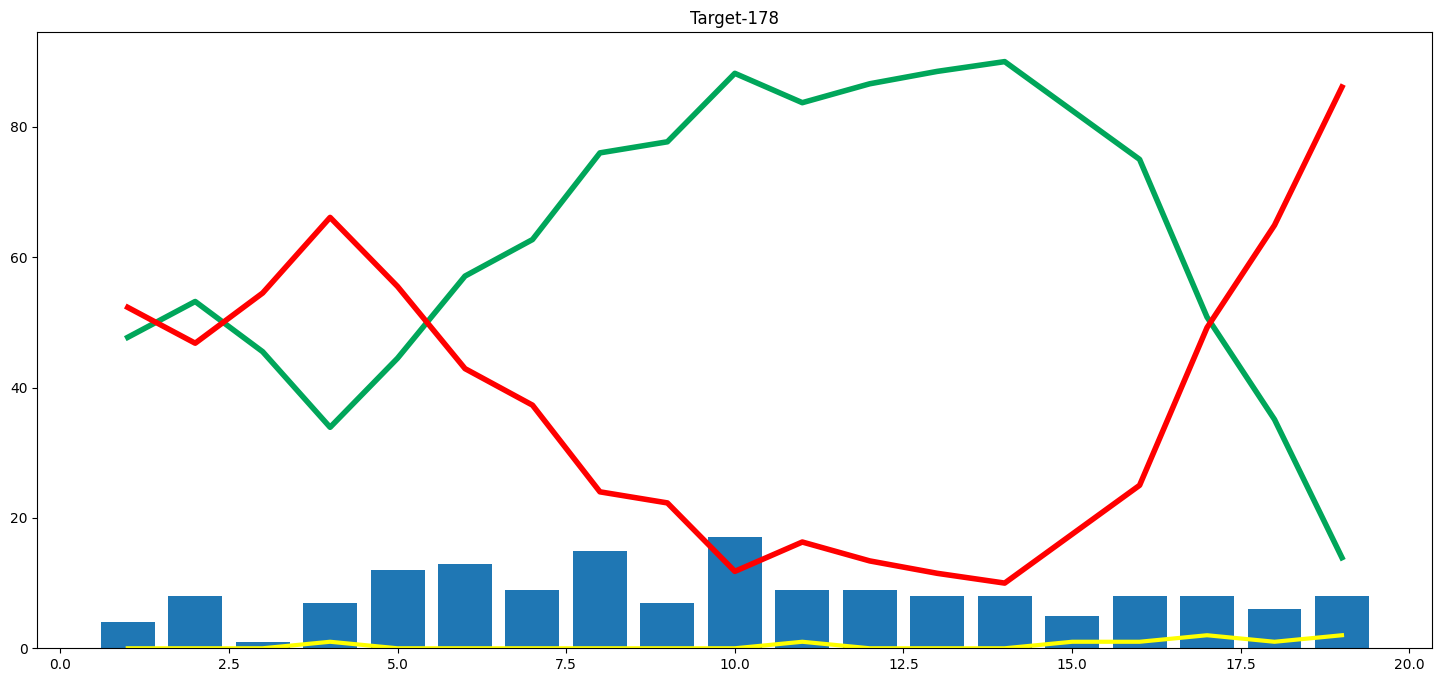

In [120]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='yellow',linewidth=3)
plt.plot(temp_df['end_of_over'],temp_df['win'],color='#00a65a',linewidth=4)
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=4)
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'])
plt.title('Target-' + str(target))

In [121]:
teams

['Chennai Super Kings',
 'Delhi Capitals',
 'Kings XI Punjab',
 'Kolkata Knight Riders',
 'Mumbai Indians',
 'Rajasthan Royals',
 'Royal Challengers Bangalore',
 'Sunrisers Hyderabad']

In [ ]:
deliverydf['city'].unique

In [122]:
import pickle
pickle.dump(pipe,open('pipe.pkl','wb'))